# EDA CASE STUDY

#### Name: Tushar Sharma
#### Reg. No.: 12018293
#### Roll No: RK20SSB64
#### Section: K20SS  

In [222]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [169]:
#loading the dataset
loan = pd.read_csv("loan.csv")
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
#checking the numer of rows and columns in dataset
loan.shape

(39717, 111)

In [171]:
# checking the dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [172]:
#checking the null values in dataset
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

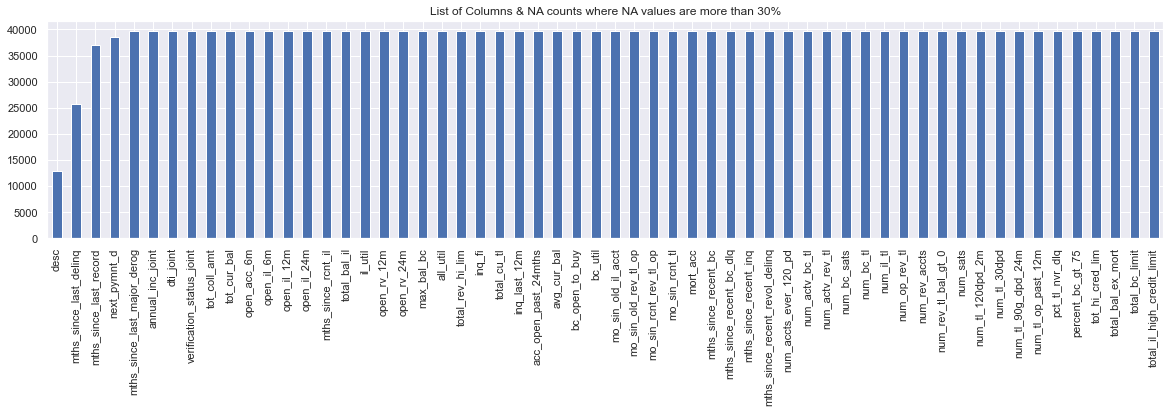

In [173]:
#plotting the null values grah where null values are greater than 30%
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(loan))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

#### Insights: So we can see from the above plot that there are 20+ columns in the dataset where all the values are NA.

In [174]:
# checking the columns where all values are null
(loan.isnull().sum()>=len(loan)).sum()

54

In [175]:
# removeNull function will remove the rows and columns based on parameters provided.
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [176]:
# removing the null columns using removeNulls function
loan = removeNulls(loan, axis =1,percent = 0.3)

Number of Columns dropped	:  58

Old dataset rows,columns (39717, 111) 
New dataset rows,columns (39717, 53)


In [177]:
# removing the null rows using removeNulls function
loan = removeNulls(loan, axis =0,percent = 0.3)


Number of Rows dropped	:  0

Old dataset rows,columns (39717, 53) 
New dataset rows,columns (39717, 53)


In [178]:
# finding the columns which has same values repeated in the whole column
unique = loan.nunique()
unique = unique[unique.values == 1]
unique

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [179]:
# removing the columns with same value in whole column
loan.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

So now we are left with (39717, 44) rows & columns.


In [180]:
# checking the columns left in dataset
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [181]:
# There are some values in emp_length which are 'n/a', we assume that are 'self-employed'.
print(loan.emp_length.unique())
loan.emp_length.fillna('0',inplace=True)
loan.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [182]:
#Removing irrelevant columns
not_required_columns = ["id","member_id","url","zip_code"]
loan.drop(labels = not_required_columns, axis =1, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

So now we are left with (39717, 40) rows & columns.


In [183]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan.int_rate=loan.int_rate.map(lambda x: x.rstrip('%'))
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [184]:
#checking the dataset after delting the irrelevant columns
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [185]:
#counting the values in purpose column
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

In [186]:
# We will analyse only those categories which contain more than 0.75% of records. Also, we are not aware what comes 
# under 'Other' we will remove this category as well.
del_loan_purpose = (loan.purpose.value_counts()*100)/len(loan)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]

loan.drop(labels = loan[loan.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

print(loan.purpose.unique())

So now we are left with (35621, 40) rows & columns.
['credit_card' 'car' 'small_business' 'wedding' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'vacation' 'house'
 'educational']


In [187]:
#counting the values in loan_status column
(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid     83.195306
Charged Off    13.966480
Current         2.838213
Name: loan_status, dtype: float64

In [188]:
# Loan amount to Annual Income ratio
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']

In [189]:
# Extract Year & Month from Issue date
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str
loan[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
5,Dec-11,Dec,11
6,Dec-11,Dec,11


In [190]:
# Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z)
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan['issue_month'] = pd.Categorical(loan['issue_month'],categories=months_order, ordered=True)

In [191]:
# Create Bins for range of Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [192]:
# Create Bins for range of Annual Income
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

In [193]:
# Create Bins for range of Interest rates
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

In [194]:
# Univariate function will plot the graphs based on the parameter values.
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()
    

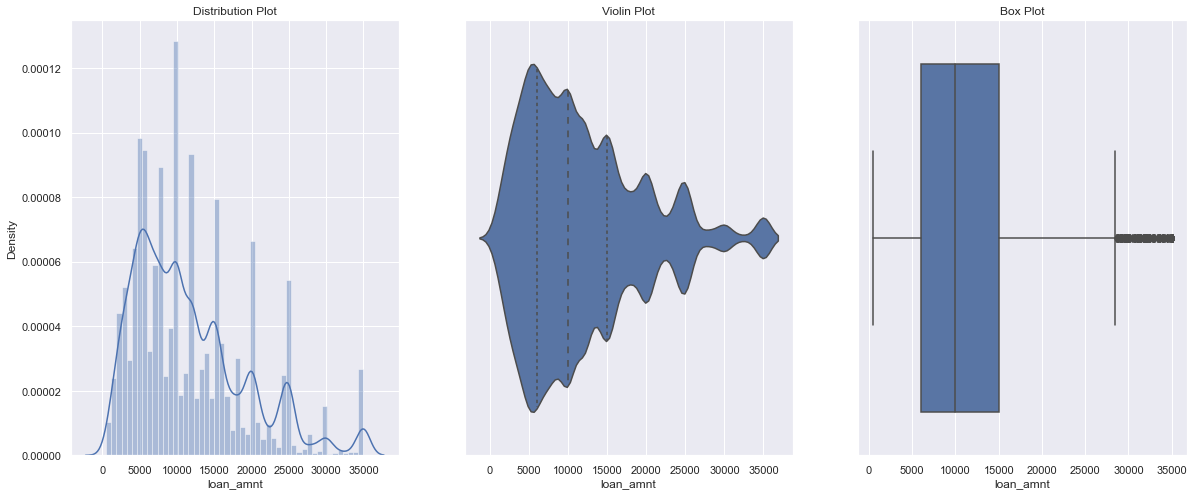

In [195]:
univariate(df=loan,col='loan_amnt',vartype=0)

#### Insights: Most of the loan amounts are distributed between 6000 to 15000 USD.

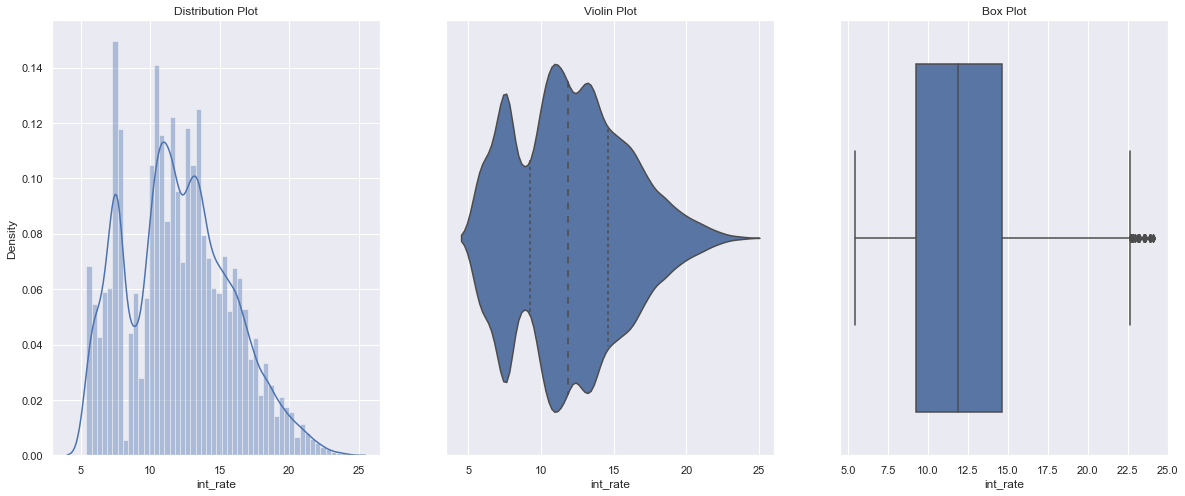

In [196]:
univariate(df=loan,col='int_rate',vartype=0)

Insights: Most of the loans interest rates are distributed between 8% to 14%.

In [197]:
loan["annual_inc"].describe()

count    3.562100e+04
mean     6.959688e+04
std      6.500998e+04
min      4.000000e+03
25%      4.160000e+04
50%      6.000000e+04
75%      8.300400e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### As max value is greater than mean value we need to remove the outliers

In [198]:
#Remove Outliers (values from 99 to 100%)
q = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < q]
loan["annual_inc"].describe()

count     35417.000000
mean      66946.761494
std       37318.468774
min        4000.000000
25%       41325.000000
50%       60000.000000
75%       82140.000000
max      294000.000000
Name: annual_inc, dtype: float64

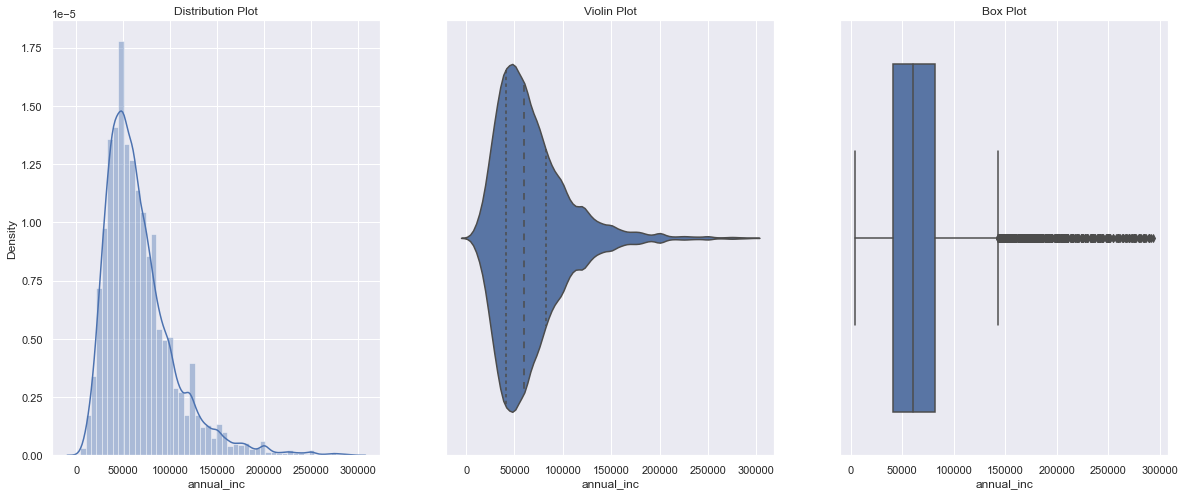

In [199]:
univariate(df=loan,col='annual_inc',vartype=0)

#### Insights: Most of the applicants earns beteen 40000 to 80000 USD annually.

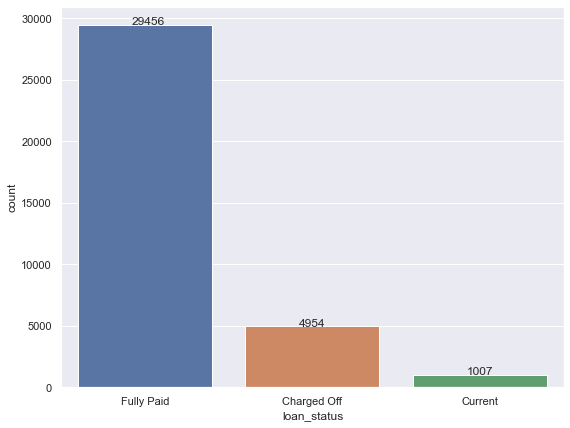

In [200]:
univariate(df=loan,col='loan_status',vartype=1)

#### Insights: 13% of the applicants Charged off.

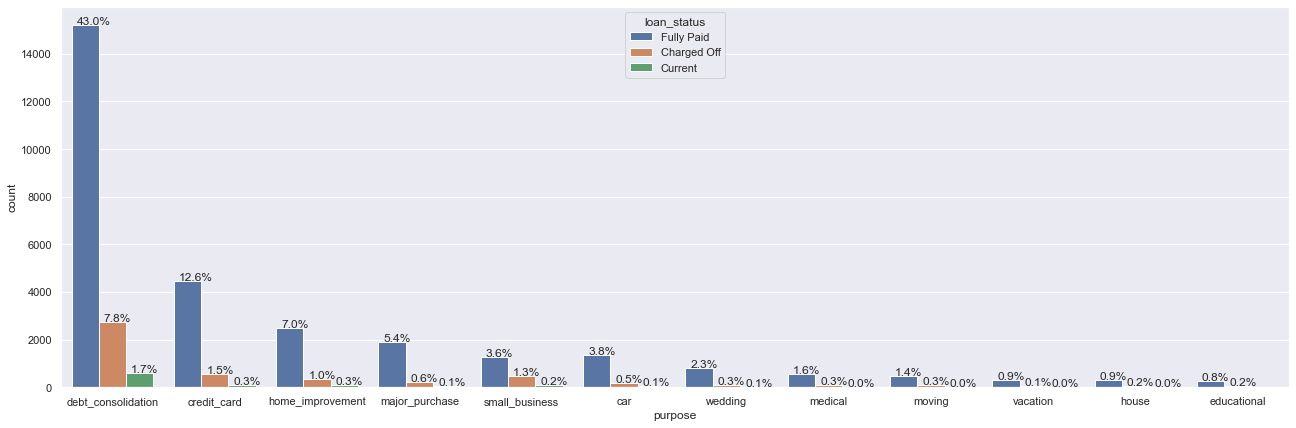

In [201]:
univariate(df=loan,col='purpose',vartype=1,hue='loan_status')

#### Insights: Approx 52% of the applicants applied loan for paying their other loans(Debt Consolidation).

In [202]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [203]:
del_home_ownership = (loan.home_ownership.value_counts()*100)/len(loan)
del_home_ownership = del_home_ownership[(del_home_ownership < 0.75) | (del_home_ownership.index == 'other')]

loan.drop(labels = loan[loan.home_ownership.isin(del_home_ownership.index)].index, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

print(loan.home_ownership.unique())

So now we are left with (35332, 46) rows & columns.
['RENT' 'OWN' 'MORTGAGE']


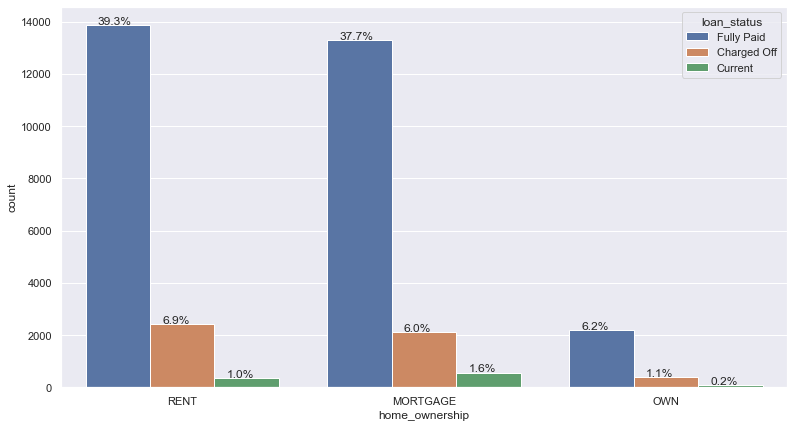

In [204]:
univariate(df=loan,col='home_ownership',vartype=1,hue='loan_status')

#### Insights: 45% of applicants are living in rented home whereas 47% applicants were mortagaged their home.

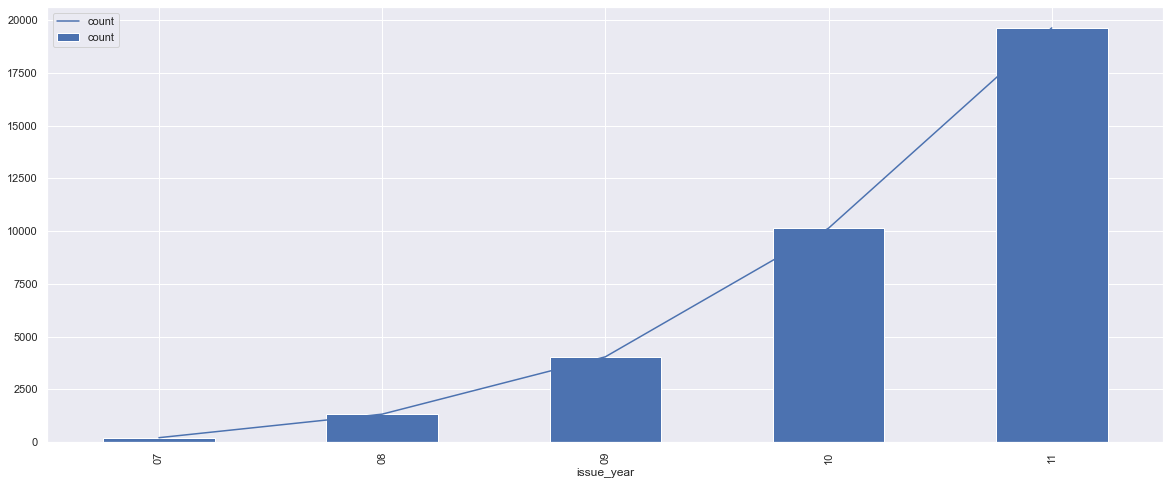

In [205]:
year_wise =loan.groupby(by= [loan.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

#### Insights: loan applicants are increasing year on year.

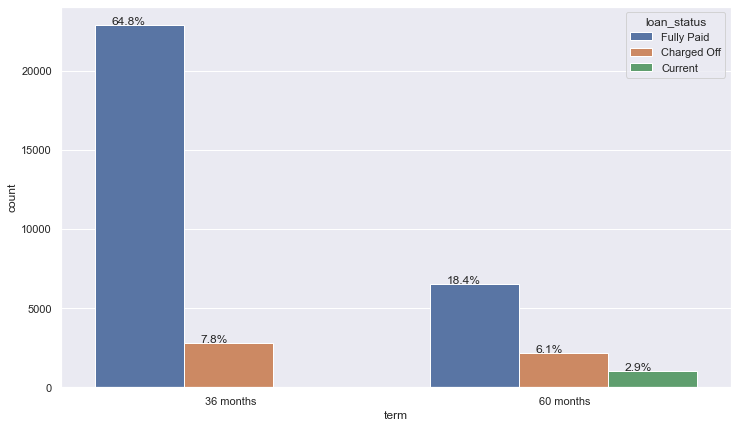

In [206]:
univariate(df=loan,col='term',vartype=1,hue='loan_status')

#### Insights: 72% of applicants applied loan for 36 months term period.

In [207]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range,int_rate_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,Jan-15,171.62,May-16,0.0,0.208333,Dec,11,0-5000,0-25000,10-12.5
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Apr-13,119.66,Sep-13,0.0,0.083333,Dec,11,0-5000,25000-50000,15 and above
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Jun-14,649.91,May-16,0.0,0.195886,Dec,11,0-5000,0-25000,15 and above
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Jan-15,161.03,Jan-16,0.0,0.138889,Dec,11,0-5000,25000-50000,7.5-10
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,May-16,1313.76,May-16,0.0,0.148923,Dec,11,5000-10000,25000-50000,15 and above


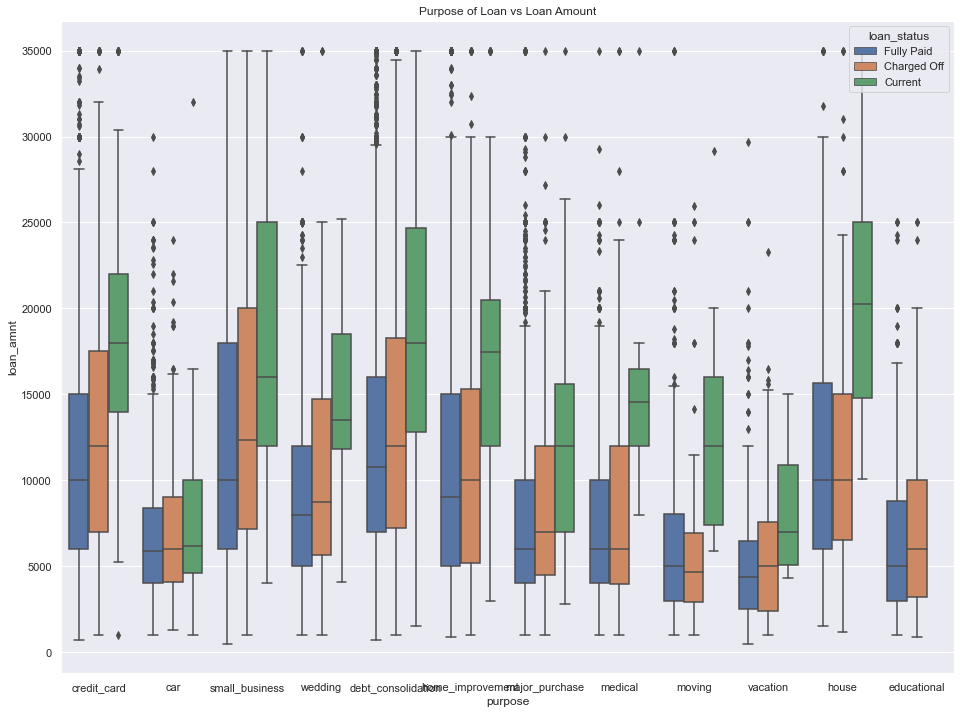

In [208]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()


In [209]:
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,loan_income_ratio
loan_amnt,1.000000,0.981056,0.939554,0.319438,0.927163,0.418375,0.075617,-0.032072,0.006225,0.169722,...,0.882799,0.850907,0.846202,0.726944,0.053990,0.136939,0.073555,0.441236,-0.041428,0.612987
funded_amnt,0.981056,1.000000,0.958203,0.323261,0.954032,0.413866,0.075248,-0.032303,0.007059,0.167863,...,0.899511,0.867412,0.864617,0.734776,0.056645,0.137739,0.075629,0.445588,-0.042200,0.600795
funded_amnt_inv,0.939554,0.958203,1.000000,0.316363,0.902637,0.396071,0.081923,-0.038410,-0.007202,0.154923,...,0.877996,0.910120,0.840913,0.727933,0.035691,0.124787,0.060842,0.436513,-0.045461,0.572059
int_rate,0.319438,0.323261,0.316363,1.000000,0.291664,0.080980,0.115100,0.155607,0.134299,0.014439,...,0.317474,0.312325,0.192901,0.538936,0.097009,0.124829,0.068986,0.160175,0.084630,0.223503
installment,0.927163,0.954032,0.902637,0.291664,1.000000,0.418410,0.062471,-0.019347,0.006941,0.165395,...,0.851652,0.812382,0.844795,0.628671,0.066030,0.119039,0.076586,0.392736,-0.037171,0.548582
annual_inc,0.418375,0.413866,0.396071,0.080980,0.418410,1.000000,-0.125617,0.029204,0.041941,0.249225,...,0.397506,0.382256,0.400351,0.282583,0.020383,0.035829,0.021766,0.216840,-0.020976,-0.319824
dti,0.075617,0.075248,0.081923,0.115100,0.062471,-0.125617,1.000000,-0.037078,-0.001303,0.289073,...,0.074993,0.080377,0.051084,0.113931,-0.011259,0.024674,0.010592,0.011080,0.002217,0.154608
delinq_2yrs,-0.032072,-0.032303,-0.038410,0.155607,-0.019347,0.029204,-0.037078,1.000000,0.008051,0.010929,...,-0.022708,-0.029362,-0.039393,0.024177,0.034713,0.012027,0.014734,-0.014763,0.003743,-0.061569
inq_last_6mths,0.006225,0.007059,-0.007202,0.134299,0.006941,0.041941,-0.001303,0.008051,1.000000,0.093163,...,-0.013024,-0.022208,-0.027211,0.022404,0.030827,0.021003,0.014020,0.025877,0.015800,-0.029680
open_acc,0.169722,0.167863,0.154923,0.014439,0.165395,0.249225,0.289073,0.010929,0.093163,1.000000,...,0.155703,0.145530,0.153860,0.117990,-0.014729,0.016528,0.006162,0.075480,0.007758,-0.045807


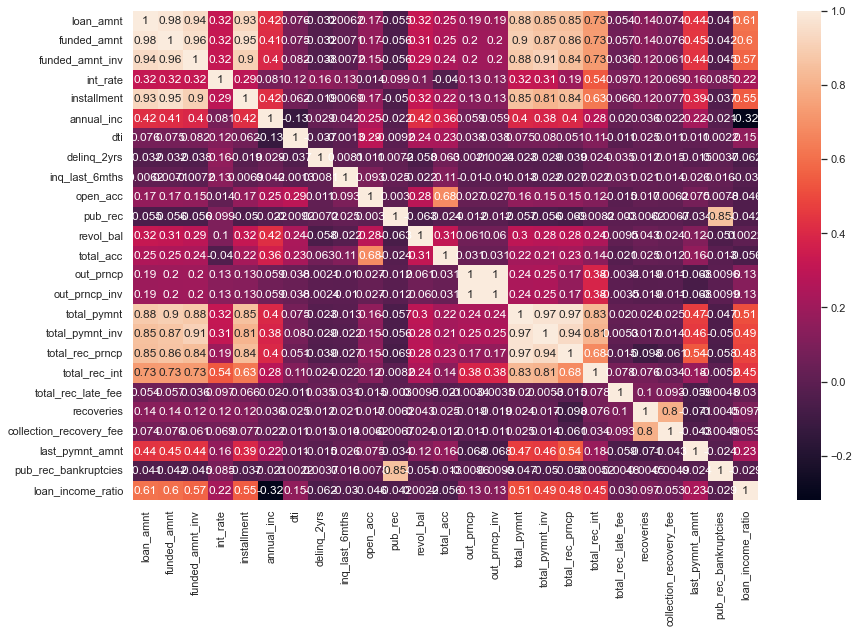

In [210]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()


#### Insights: It is clear from the Heatmap that how 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated.So we can take any one column out of them for our analysis.

In [211]:
loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan.loc[loan['loan_status']=='Charged Off']

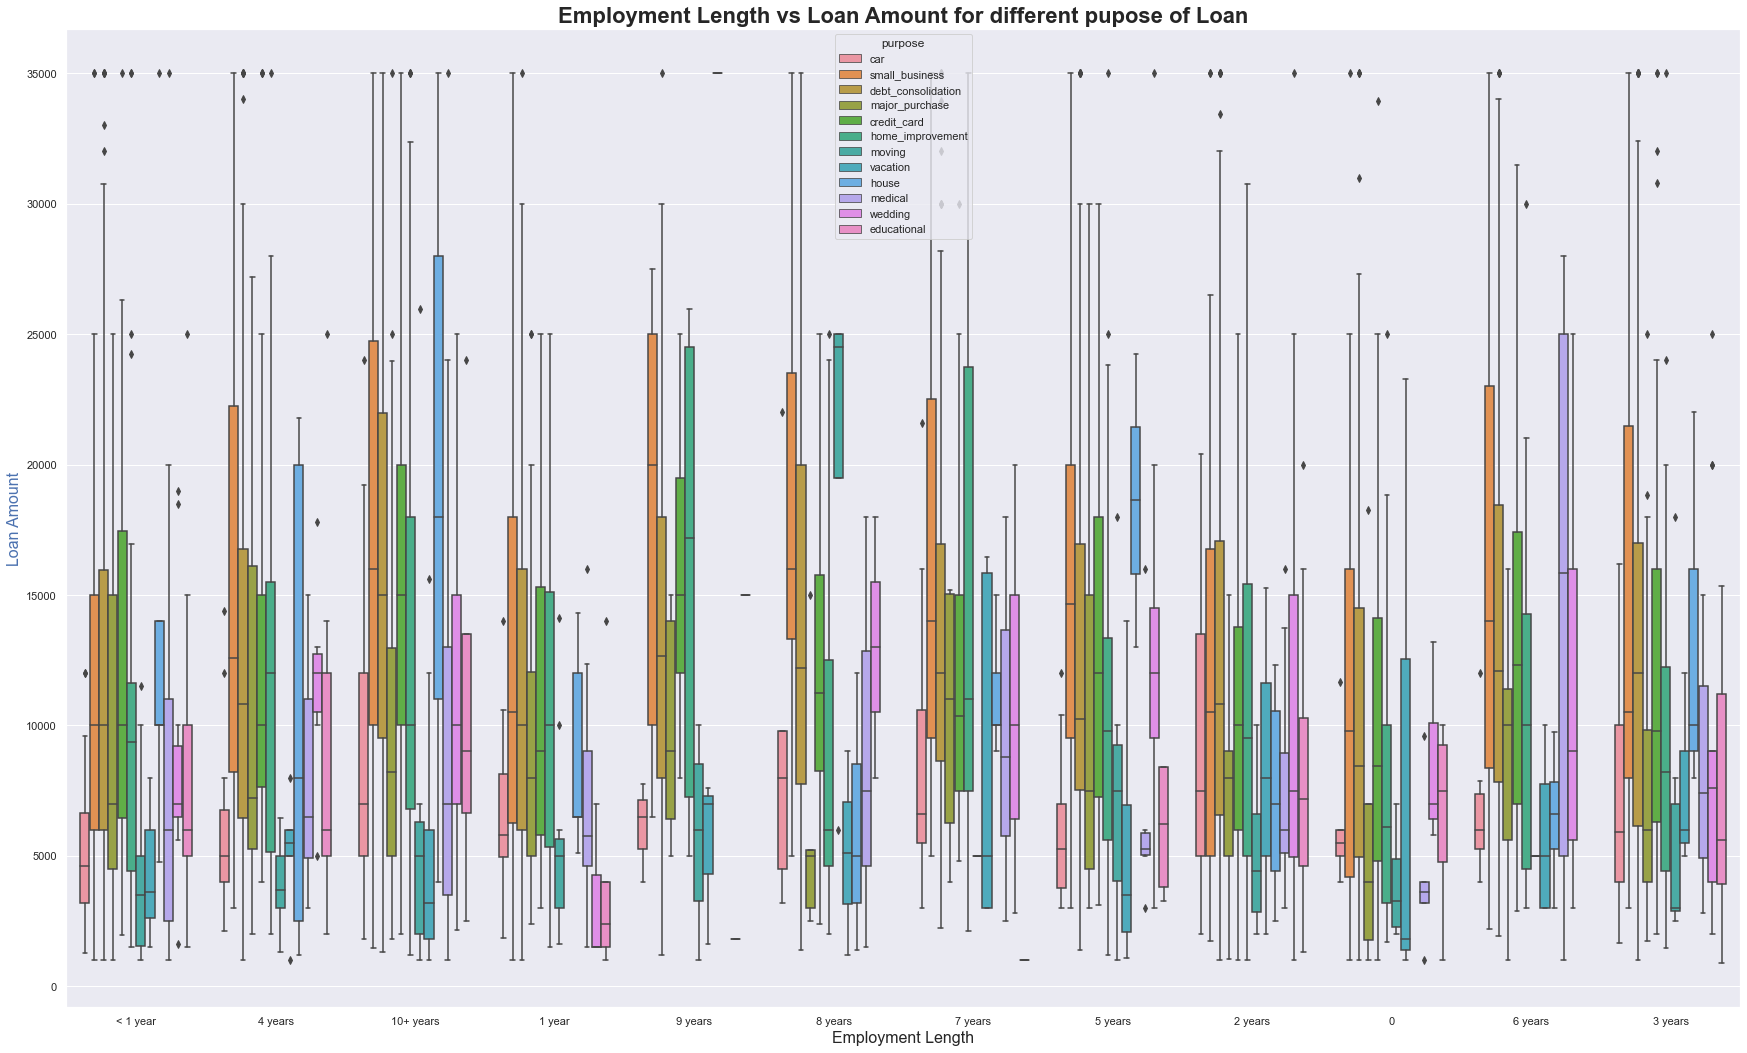

In [224]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

In [213]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [214]:
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

In [215]:
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
NJ,254,53,1343,1650,0.154
NM,30,4,140,174,0.172
NV,90,15,330,435,0.207
NY,428,95,2801,3324,0.129
OH,138,41,928,1107,0.125
OK,35,11,218,264,0.133
OR,68,14,330,412,0.165
PA,157,49,1131,1337,0.117
RI,24,4,142,170,0.141


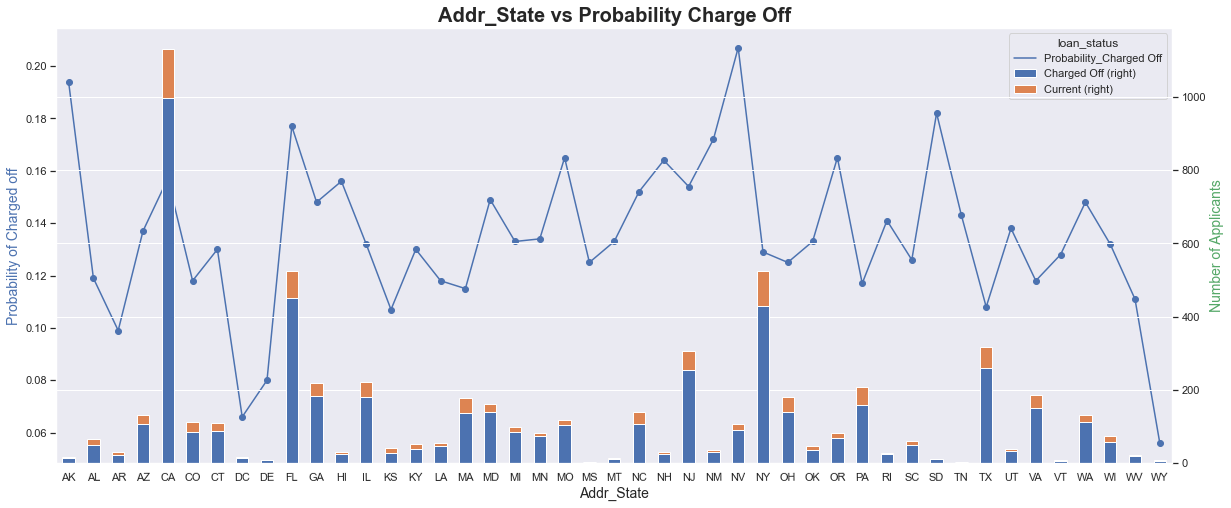

In [216]:
states = crosstab(loan_filter_states,'addr_state')
display(states.tail(20))

bivariate_prob(df =loan_filter_states,col ='addr_state')

#### Insights: There are multiple States/Provinces with high probability of charge,highest being 'NV' at 20%

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,159,50,1336,1545,0.103
credit_card,539,103,4457,5099,0.106
debt_consolidation,2753,585,15181,18519,0.149
educational,56,0,265,321,0.174
home_improvement,340,99,2479,2918,0.117
house,59,14,301,374,0.158
major_purchase,220,37,1912,2169,0.101
medical,106,12,568,686,0.155
moving,90,7,480,577,0.156


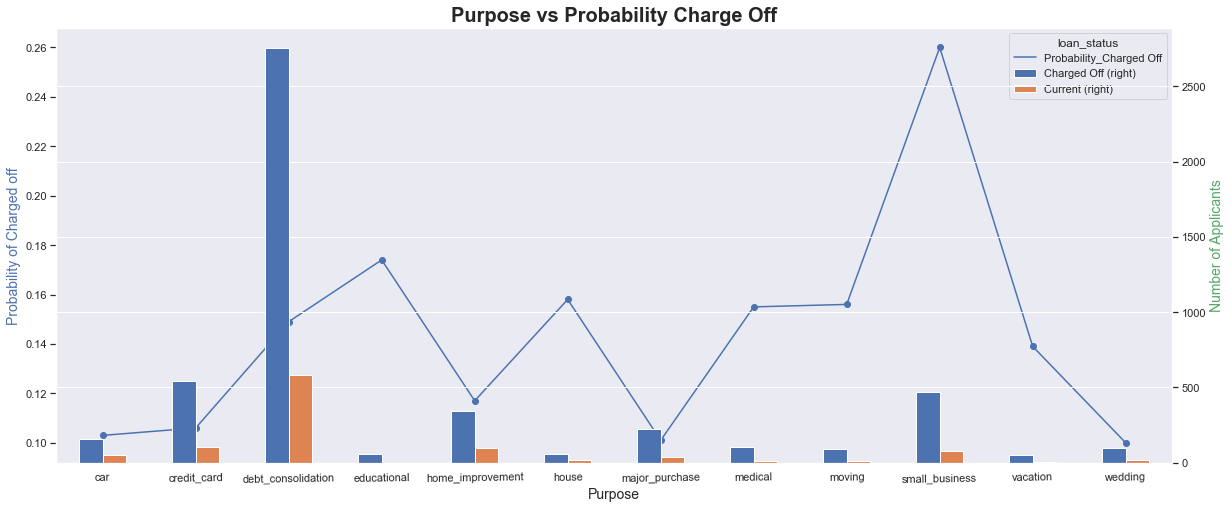

In [217]:
purpose = crosstab(loan,'purpose')
display(purpose)

bivariate_prob(df =loan,col ='purpose',stacked=False)

#### Insights: Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off of 26%. So bank should take extra caution like take some asset or guarentee while approving the loan for purpose of 'small business'

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
grade,,,,,
A,512,31,8369,8912,0.057
B,1244,303,9144,10691,0.116
C,1167,240,5762,7169,0.163
D,987,195,3567,4749,0.208
E,645,161,1771,2577,0.250
F,294,63,593,950,0.309
G,89,14,181,284,0.313


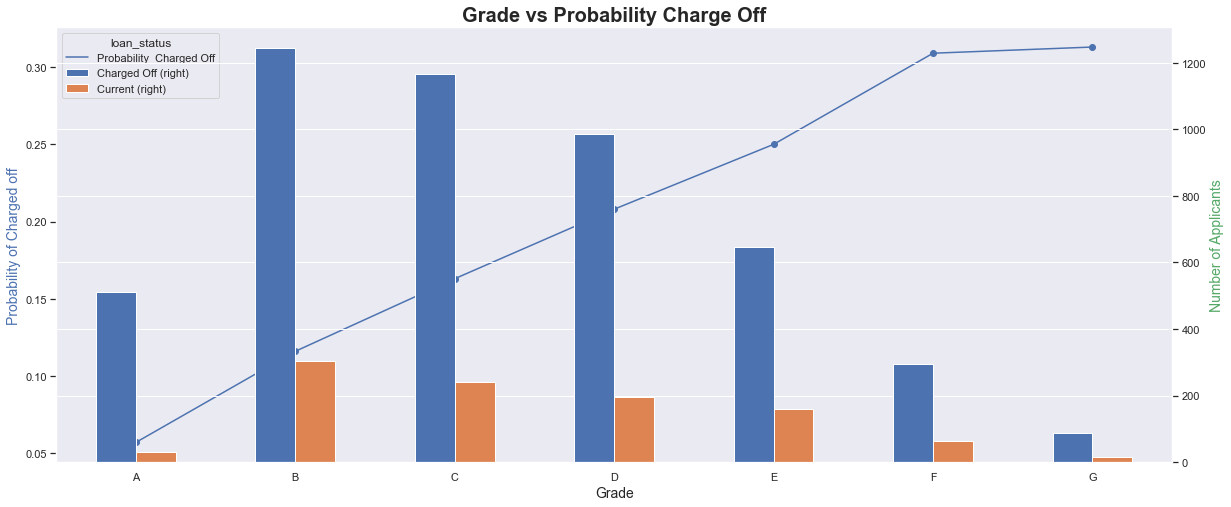

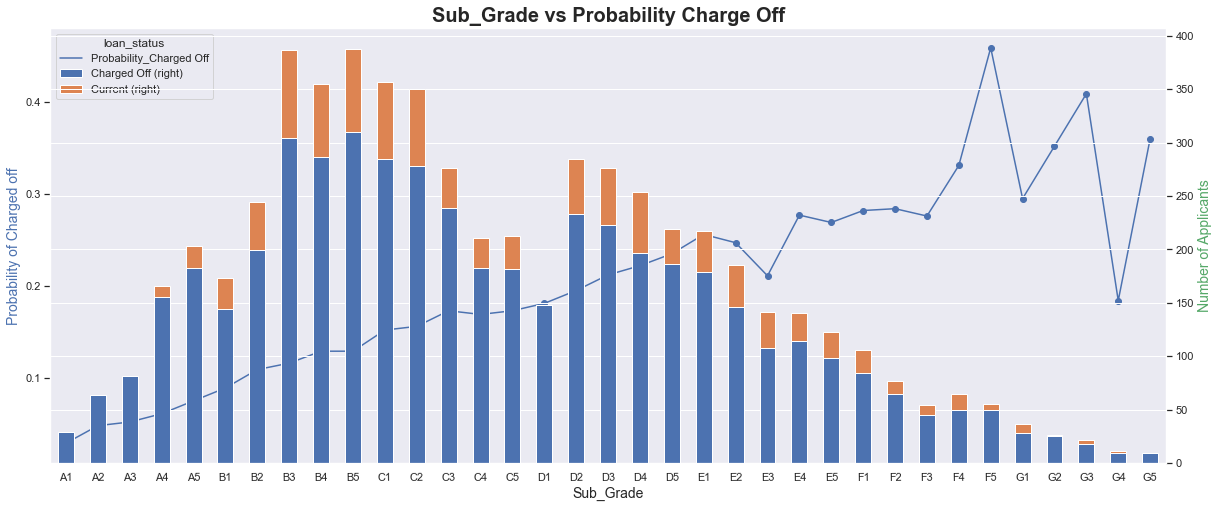

In [218]:
grade = crosstab(loan,'grade')
display(grade)

bivariate_prob(df =loan,col ='grade',stacked=False)
bivariate_prob(df =loan,col ='sub_grade')

#### Insights: As we move from Grade A to G, probability that person will charged off is increasing.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,,
0-25000,386,19,1705,2110,0.183
25000-50000,1864,285,9531,11680,0.160
50000-75000,1523,326,9036,10885,0.140
75000-100000,669,198,4816,5683,0.118
100000 and above,496,179,4299,4974,0.100


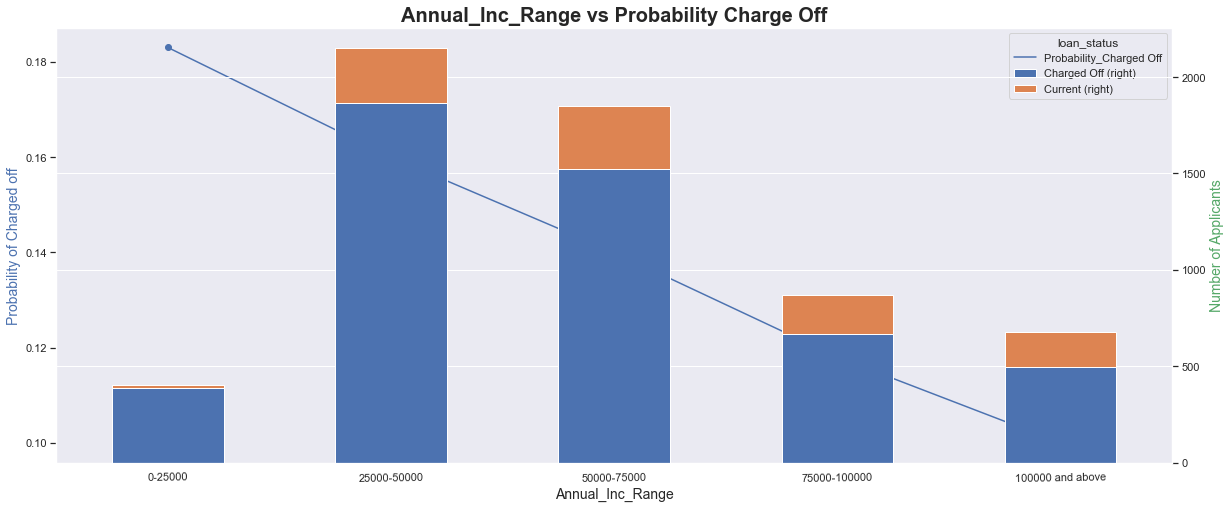

In [219]:
annual_inc_range = crosstab(loan,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan,col ='annual_inc_range')

#### Insights: As the annual income is decreasing the probability that person will default is increasing with highest of 18% at (0 to 25000) salary bracket.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,,
0-7.5,224,5,4580,4809,0.047
7.5-10,480,59,5649,6188,0.078
10-12.5,1086,238,7227,8551,0.127
12.5-15,1286,231,6577,8094,0.159
15 and above,1592,387,4923,6902,0.231


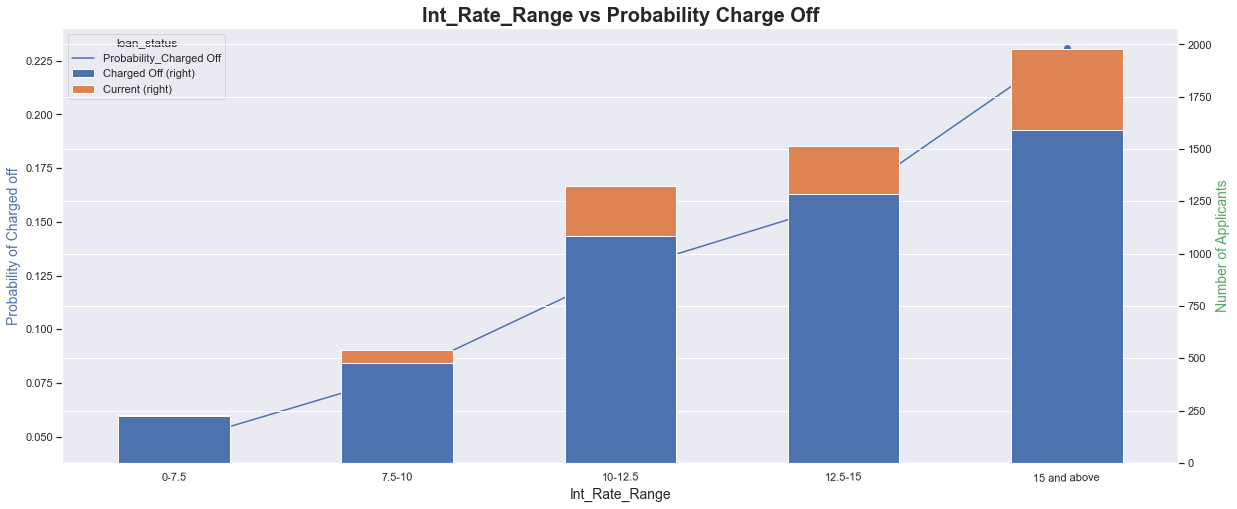

In [220]:
int_rate_range = crosstab(loan,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan,col ='int_rate_range')

#### Insights: As the interest rate is increasing the probability that person will default is increasing with highest of 23% at 15% & above bracket.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
emp_length,,,,,
0,189,34,681,904,0.209
1 year,395,65,2378,2838,0.139
10+ years,1171,359,6377,7907,0.148
2 years,485,88,3330,3903,0.124
3 years,485,67,3111,3663,0.132
4 years,403,83,2601,3087,0.131
5 years,413,77,2456,2946,0.140
6 years,276,53,1693,2022,0.136
7 years,232,54,1297,1583,0.147


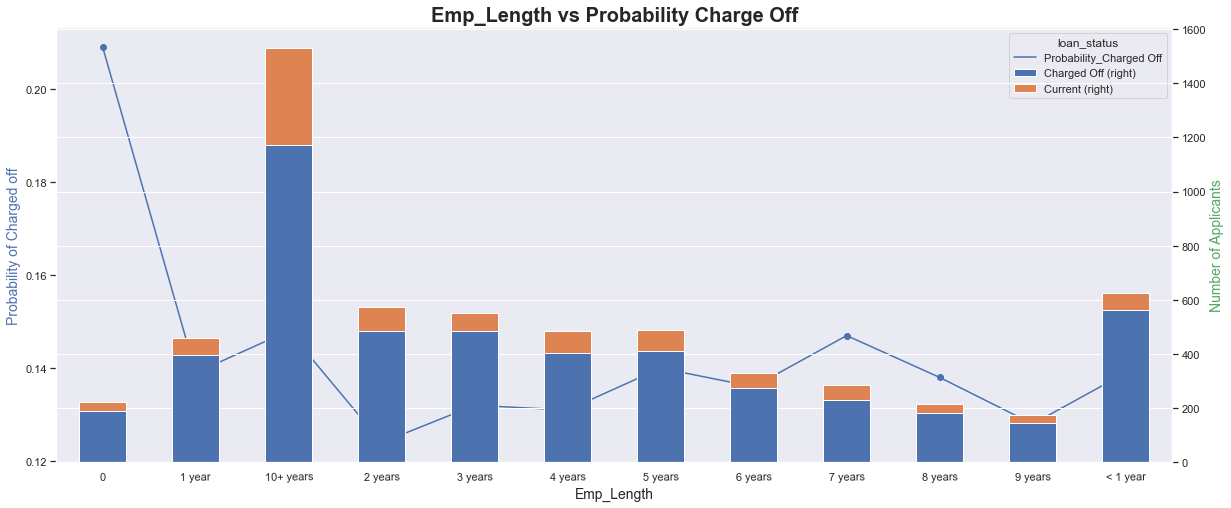

In [221]:
emp_length = crosstab(loan,'emp_length')
display(emp_length)

bivariate_prob(df =loan,col ='emp_length')

#### Insights: Applicants who are self employed & less than 1 year of experience are more probable of charged off..